In [1]:
import pandas as pd

In [3]:
HGU_JAN = pd.read_csv('KDG00038A_HousingGasUsage202201.csv')
HGU_AUG = pd.read_csv('KDG00038A_HousingGasUsage202208.csv')

In [4]:
HCS_JAN = pd.read_csv('KDG00035A_HousingContractStatus202201.csv')
HCS_AUG = pd.read_csv('KDG00035A_HousingContractStatus202208.csv')

In [10]:
HNP_Q1 = pd.read_csv('KDG00056A_HousingNonPaymentQ1.csv')

In [13]:
HNP_Q1['NonPayment'] = 1

In [14]:
HNP_Q1.columns

Index(['STD_YM', 'END_DT', 'GM_VOL', 'AREA_NM', 'CTGG_NM', 'EMD_NM',
       'DTL_ADDR', 'HMNO_LTNO', 'HSNO_LTNO', 'RD_NM', 'RDNM_ADDR', 'BLD_HMNO',
       'BLD_HSNO', 'BLD_NM', 'DNGNM', 'NORM_NM', 'BZRNO', 'CMPNM_NM',
       'BIZ_TY_CD', 'PLCB_ADDR', 'EMPR_SN', 'GAS_TYPE', 'HSHD_NO',
       'HSHD_TYPE_CD', 'HSHD_TYPE_NM', 'CNTR_TYPE_CD', 'CNTR_TYPE_NM',
       'WRT_DATE', 'NonPayment'],
      dtype='object')

In [16]:
HNP_Q1 = HNP_Q1[['EMPR_SN', 'NonPayment']]

In [18]:
df = pd.merge(HGU_JAN, HNP_Q1, how='left', on='EMPR_SN')

In [39]:
df = df.fillna(0)

In [21]:
df = pd.merge(df, HCS_JAN, on='EMPR_SN')

In [27]:
df.columns

Index(['NO', 'EMPR_SN', 'HSHD_NO_x', 'HSHD_TYPE_CD_x', 'HSHD_TYPE_NM_x',
       'AREA_NM', 'CTGG_NM', 'EMD_NM', 'DTL_ADDR', 'HMNO_LTNO', 'USEAMT',
       'WRT_DATE_x', 'NonPayment', 'STD_YM', 'CNTR_DT', 'END_DT', 'HSHD_NO_y',
       'HSHD_TYPE_CD_y', 'HSHD_TYPE_NM_y', 'CNTR_TYPE_CD', 'CNTR_TYPE_NM',
       'GM_VOL', 'GAS_TYPE', 'PROS_SP_CD', 'WRT_DATE_y'],
      dtype='object')

In [29]:
df.CNTR_DT.value_counts()

a2RnYXNzZnRwaXYFBQUFBcj0U3gMyRkjFlMLEtlG3qxdfkyyalxfAjA6+fNQkBRm    1367
a2RnYXNzZnRwaXYFBQUFBS09r2gG4oxKcbV/tpjKMQbQ/3CeP9cQcQEEjNbPxk/s     839
a2RnYXNzZnRwaXYFBQUFBeodPb+Gsc1pov71ykvDRBexFiRxEEkSCgdtLT6m2lM9     741
a2RnYXNzZnRwaXYFBQUFBV0wRAzi/Lh2LB1lDQr5xHfHYibf500/vz9FI5dQxnRX     736
a2RnYXNzZnRwaXYFBQUFBbfJdmbzK/QXfYvEIcv8/w4UO6zCNQlaati0IFgW1uRA     636
                                                                    ... 
a2RnYXNzZnRwaXYFBQUFBblcoDeMIhOaKvKj143dUZxXjtq3uCGAo9OBV746iPW6       1
a2RnYXNzZnRwaXYFBQUFBW3PRuQVqYORXGNa1nCqOIDKhWZLNZBy2dZDPyYp/ymw       1
a2RnYXNzZnRwaXYFBQUFBZV+Psbr5VonT89FQT8xwekd58MLbl6RLwtZREv3fwCO       1
a2RnYXNzZnRwaXYFBQUFBU0kcmcchoe8NgNRqrO8Vb0P9JZk40RzXc+z3I4NKbCo       1
a2RnYXNzZnRwaXYFBQUFBQZvviIKU1iEa+qBvwXKmh05k/zpdmAYe94Fb+uFC0Cc       1
Name: CNTR_DT, Length: 11434, dtype: int64

In [30]:
df.NonPayment.value_counts()

0.0    508731
1.0    151480
Name: NonPayment, dtype: int64

In [34]:
df.USEAMT.value_counts()

0       21854
100     14439
3        8924
2        8618
4        8591
        ...  
891         1
696         1
893         1
1058        1
1131        1
Name: USEAMT, Length: 829, dtype: int64

In [35]:
df.GM_VOL.value_counts()

4.0       579080
2.0        42713
6.0        36188
10.0        1471
16.0         430
25.0         110
3.0          108
40.0          35
65.0          15
100.0         15
250.0         10
160.0          7
400.0          5
1000.0         2
650.0          2
5.0            1
Name: GM_VOL, dtype: int64

##### 데이터 구분

In [127]:
import seaborn as sns

In [84]:
df['HSHD_TYPE_NM_x'].value_counts()

연립/아파트(공동주택)    421621
단독주택            102251
다가구주택(원룸)        98581
다세대주택(빌라)        37758
Name: HSHD_TYPE_NM_x, dtype: int64

In [85]:
df_apt = df[df['HSHD_TYPE_NM_x'] == '연립/아파트(공동주택)']
df_dandok = df[df['HSHD_TYPE_NM_x'] == '단독주택']
df_dagagu = df[df['HSHD_TYPE_NM_x'] == '다가구주택(원룸)']
df_dasede = df[df['HSHD_TYPE_NM_x'] == '다세대주택(빌라)']

<AxesSubplot:xlabel='USEAMT', ylabel='Density'>

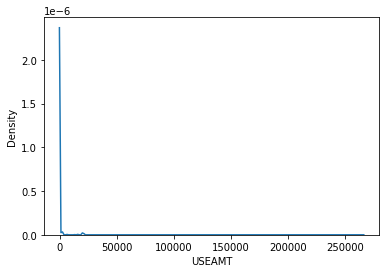

In [128]:
sns.kdeplot(df_apt.USEAMT)

In [129]:
def remove_out(dataframe, remove_col):
    dff = dataframe
    for k in remove_col:
        level_1q = dff[k].quantile(0.25)
        level_3q = dff[k].quantile(0.75)
        IQR = level_3q - level_1q
        rev_range = 3
        dff = dff[(dff[k] <= level_3q + (rev_range*IQR)) & (dff[k] >= level_1q - (rev_range*IQR))]
        dff = dff.reset_index(drop=True)
    return dff

In [136]:
df_apt = remove_out(df_apt, ['USEAMT'])
df_dandok = remove_out(df_dandok, ['USEAMT'])
df_dagagu = remove_out(df_dagagu, ['USEAMT'])
df_dasede = remove_out(df_dasede, ['USEAMT'])

<AxesSubplot:xlabel='USEAMT', ylabel='Density'>

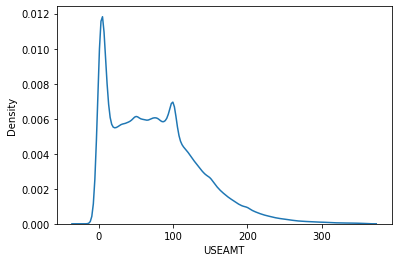

In [163]:
sns.kdeplot(df_apt.USEAMT)

<AxesSubplot:xlabel='USEAMT', ylabel='Density'>

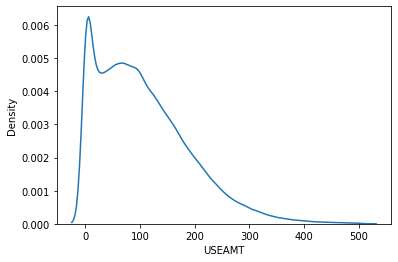

In [158]:
sns.kdeplot(df_dandok.USEAMT)

<AxesSubplot:xlabel='USEAMT', ylabel='Density'>

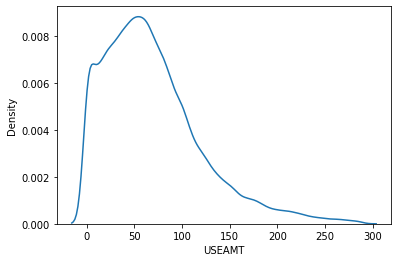

In [157]:
sns.kdeplot(df_dagagu.USEAMT)

<AxesSubplot:xlabel='USEAMT', ylabel='Density'>

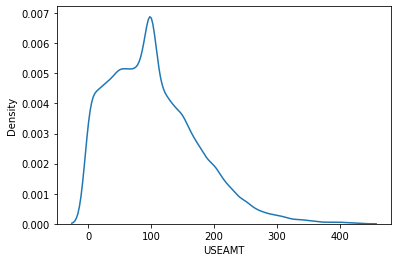

In [162]:
sns.kdeplot(df_dasede.USEAMT)

In [193]:
df_apt.GM_VOL.value_counts()

4.0      346149
2.0       42584
6.0       31740
10.0        196
3.0          60
16.0         41
25.0         23
0.0          13
40.0          6
65.0          5
250.0         3
100.0         3
Name: GM_VOL, dtype: int64

<AxesSubplot:xlabel='GM_VOL', ylabel='Count'>

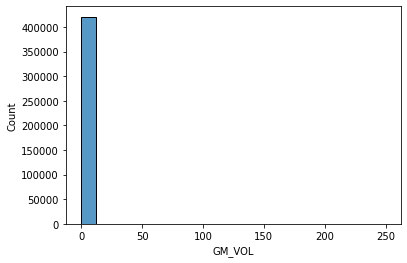

In [192]:
sns.histplot(df_apt.GM_VOL)

In [159]:
len(df_dandok)

101986

In [160]:
len(df_apt)

420823

##### 클러스터링 분석 진행

In [138]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

##### 연립/아파트

In [139]:
cluster_data = df_apt[['GM_VOL', 'USEAMT']]

In [140]:
scaler = MinMaxScaler()

In [141]:
cluster_data[['GM_VOL']] = scaler.fit_transform(cluster_data[['GM_VOL']])

<ipython-input-141-c56a88615987>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data[['GM_VOL']] = scaler.fit_transform(cluster_data[['GM_VOL']])
/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [142]:
cluster_data[['USEAMT']] = scaler.fit_transform(cluster_data[['USEAMT']])

<ipython-input-142-f360dbe76f2a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data[['USEAMT']] = scaler.fit_transform(cluster_data[['USEAMT']])
/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [144]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(cluster_data) for k in range(1, 10)]

In [145]:
inertias = [model.inertia_ for model in kmeans_per_k]

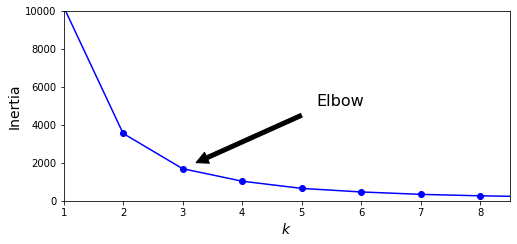

In [148]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-") # 이부분이 중요. x축은 range(1, 10): 총 9번이니까, 위에서 k 반복문 그대로 들어가기

plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)

plt.annotate('Elbow',
             xy=(3, inertias[2]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 10000])
plt.show()

In [149]:
apt_kmeans = KMeans(n_clusters=3)

In [150]:
apt_clusters = apt_kmeans.fit_predict(cluster_data)

In [151]:
df_apt['cluster'] = apt_clusters

In [164]:
df_apt['cluster'].value_counts()

0    182048
2    174345
1     64430
Name: cluster, dtype: int64

In [155]:
df_apt.columns

Index(['NO', 'EMPR_SN', 'HSHD_NO_x', 'HSHD_TYPE_CD_x', 'HSHD_TYPE_NM_x',
       'AREA_NM', 'CTGG_NM', 'EMD_NM', 'DTL_ADDR', 'HMNO_LTNO', 'USEAMT',
       'WRT_DATE_x', 'NonPayment', 'STD_YM', 'CNTR_DT', 'END_DT', 'HSHD_NO_y',
       'HSHD_TYPE_CD_y', 'HSHD_TYPE_NM_y', 'CNTR_TYPE_CD', 'CNTR_TYPE_NM',
       'GM_VOL', 'GAS_TYPE', 'PROS_SP_CD', 'WRT_DATE_y', 'cluster'],
      dtype='object')

In [153]:
df_apt.to_excel('df_apt.xlsx')

##### 단독주택

In [165]:
cluster_data = df_dandok[['GM_VOL', 'USEAMT']]

scaler = MinMaxScaler()

cluster_data[['GM_VOL']] = scaler.fit_transform(cluster_data[['GM_VOL']])
cluster_data[['USEAMT']] = scaler.fit_transform(cluster_data[['USEAMT']])

<ipython-input-165-f5f677efd15f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data[['GM_VOL']] = scaler.fit_transform(cluster_data[['GM_VOL']])
/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-165-f5f677efd15f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [166]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(cluster_data) for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

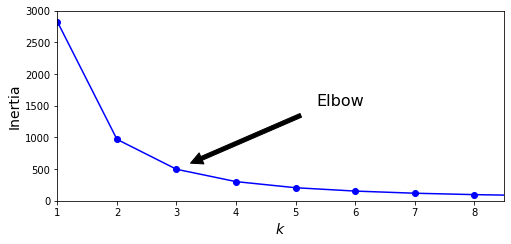

In [169]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-") # 이부분이 중요. x축은 range(1, 10): 총 9번이니까, 위에서 k 반복문 그대로 들어가기

plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)

plt.annotate('Elbow',
             xy=(3, inertias[2]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 3000])
plt.show()

In [170]:
dandok_kmeans = KMeans(n_clusters=3)
dandok_clusters = dandok_kmeans.fit_predict(cluster_data)

In [171]:
df_dandok['cluster'] = dandok_clusters

In [172]:
df_dandok['cluster'].value_counts()

0    47614
1    39400
2    14972
Name: cluster, dtype: int64

In [173]:
df_dandok.to_excel('df_dandok.xlsx')

##### 다가구주택

In [174]:
cluster_data = df_dagagu[['GM_VOL', 'USEAMT']]

scaler = MinMaxScaler()

cluster_data[['GM_VOL']] = scaler.fit_transform(cluster_data[['GM_VOL']])
cluster_data[['USEAMT']] = scaler.fit_transform(cluster_data[['USEAMT']])

<ipython-input-174-e007f0153714>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data[['GM_VOL']] = scaler.fit_transform(cluster_data[['GM_VOL']])
/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-174-e007f0153714>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [175]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(cluster_data) for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

In [176]:
inertias

[3143.6963569826326,
 1157.8691499708746,
 559.3995428423136,
 326.589897524864,
 213.96970450219436,
 152.15182557107187,
 114.0915510372827,
 89.04385498979288,
 72.51986073237289]

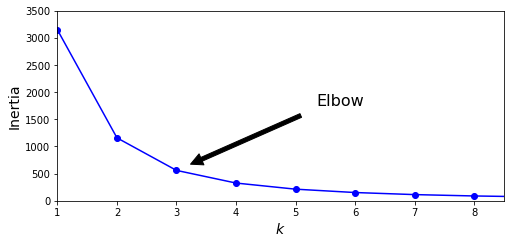

In [178]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-") # 이부분이 중요. x축은 range(1, 10): 총 9번이니까, 위에서 k 반복문 그대로 들어가기

plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)

plt.annotate('Elbow',
             xy=(3, inertias[2]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 3500])
plt.show()

In [179]:
dagagu_kmeans = KMeans(n_clusters=3)
dagagu_clusters = dagagu_kmeans.fit_predict(cluster_data)

In [180]:
df_dagagu['cluster'] = dagagu_clusters

In [181]:
df_dagagu['cluster'].value_counts()

0    45346
2    40940
1    11650
Name: cluster, dtype: int64

In [182]:
df_dagagu.to_excel('df_dagagu.xlsx')

##### 다세대 주택

In [183]:
cluster_data = df_dasede[['GM_VOL', 'USEAMT']]

scaler = MinMaxScaler()

cluster_data[['GM_VOL']] = scaler.fit_transform(cluster_data[['GM_VOL']])
cluster_data[['USEAMT']] = scaler.fit_transform(cluster_data[['USEAMT']])

<ipython-input-183-c39264a17855>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data[['GM_VOL']] = scaler.fit_transform(cluster_data[['GM_VOL']])
/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-183-c39264a17855>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [184]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(cluster_data) for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

In [185]:
inertias

[1024.9556542416271,
 365.54169743035493,
 186.07410916272715,
 112.64211655936259,
 78.9020632031653,
 56.278978077233084,
 43.5572905647413,
 36.09692635332878,
 29.659317335537988]

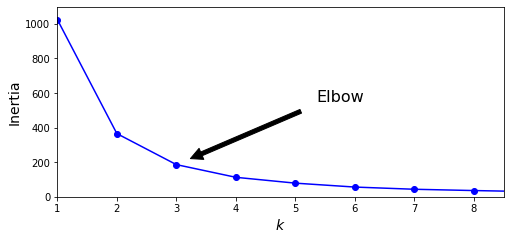

In [186]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-") # 이부분이 중요. x축은 range(1, 10): 총 9번이니까, 위에서 k 반복문 그대로 들어가기

plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)

plt.annotate('Elbow',
             xy=(3, inertias[2]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1100])
plt.show()

In [187]:
dasede_kmeans = KMeans(n_clusters=3)
dasede_clusters = dasede_kmeans.fit_predict(cluster_data)

In [189]:
df_dasede['cluster'] = dasede_clusters

In [190]:
df_dasede['cluster'].value_counts()

0    16398
2    14701
1     6606
Name: cluster, dtype: int64

In [191]:
df_dasede.to_excel('df_dasede.xlsx')

In [195]:
!pip install shap

     |████████████████████████████████| 575 kB 6.7 MB/s eta 0:00:01


In [196]:
import shap